# Mental rotation experiment analysis

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("../lib")

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import timedelta
import path

from snippets import datapackage as dpkg
import analyses
import analyses.util as util
import plots

In [5]:
ROOT = path.Path("../")
CONFIG = util.load_config(ROOT.joinpath("config.ini"))
VERSION = CONFIG.get("global", "version")
SEED = CONFIG.getint("global", "seed")
FIG_PATH = ROOT.joinpath(CONFIG.get("paths", "figures"), VERSION)
DATA_PATH = ROOT.joinpath(CONFIG.get("paths", "data"))
RESULTS_PATH = ROOT.joinpath(CONFIG.get("paths", "results"), VERSION)
RUN_ANALYSES = True

## Load data

In [6]:
exp_all, exp_data = util.load_human(VERSION, DATA_PATH)
all_data = util.load_all(VERSION, DATA_PATH, human=exp_data)

/Users/jhamrick/miniconda3/envs/mental-rotation/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
WARNING -- MainProcess/analysis.py -- Excluding 82/40000 trials from analysis


Compute the average amount of time it takes to complete the
experiment, as well as the average hourly wage.

In [7]:
exp_all['timestamp'] = pd.to_datetime(exp_all['timestamp'])
starttime = exp_all.groupby('pid').apply(lambda x: x.sort_values(by='timestamp')['timestamp'].min())
endtime = exp_all.groupby('pid').apply(lambda x: x.sort_values(by='timestamp')['timestamp'].max())
exptime = endtime - starttime
medtime = timedelta(seconds=exptime.median().total_seconds())
payrate = (1.0 / (exptime.astype(int) / (1e9 * 60 * 60))).mean()
print "Median time: %s" % medtime
print "Average pay: $%.2f / hour" % payrate

Median time: 0:16:04.233000
Average pay: $3.69 / hour


Print out the number of participants in each condition.

In [8]:
print "%d participants" % len(exp_data['exp']['pid'].drop_duplicates())
exp_data['exp'].groupby('condition').apply(lambda x: len(x['pid'].drop_duplicates()))

200 participants


condition
0    25
1    25
2    25
3    25
4    25
5    25
6    25
7    25
dtype: int64

Plot a histogram of overall participant accuracy.

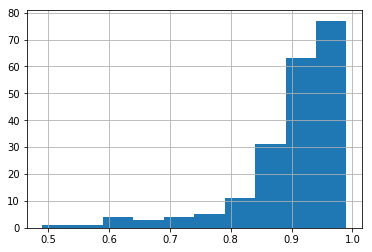

In [9]:
exp_data['expB'].groupby('pid')['correct'].mean().hist()

## Response time analysis

In [10]:
if RUN_ANALYSES:
    analyses.overall_response_time.run(all_data, RESULTS_PATH, SEED)
pd.read_csv(RESULTS_PATH.joinpath(analyses.overall_response_time.filename))

,model,upper,median,lower
0,bq,20.590382,20.505003,20.417755
1,bqp,20.595606,20.501547,20.408970
2,exp,1992.091844,1981.122791,1969.356879
3,expA,2065.293671,2046.493718,2028.619559
4,expB,1936.013718,1921.670254,1905.273074
5,gs,722.000000,722.000000,722.000000
6,hc,16.792348,16.700774,16.622324
7,oc,6.149474,6.054333,5.960824
8,th,7.966356,7.816962,7.685763


Plot overall response times:

[Path(u'../figures/D/response_time_histograms.png'),
 Path(u'../figures/D/response_time_histograms.pdf')]

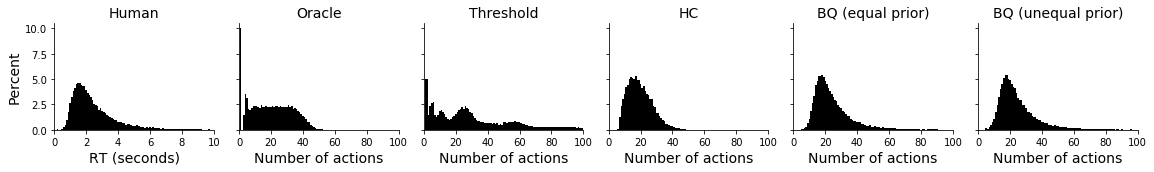

In [11]:
if RUN_ANALYSES:
    analyses.all_response_times.run(all_data, RESULTS_PATH, SEED)
plots.response_time_histograms.plot(RESULTS_PATH, FIG_PATH)

Plot response times as a function of angle:

[Path(u'../figures/D/response_time_accuracy.png'),
 Path(u'../figures/D/response_time_accuracy.pdf')]

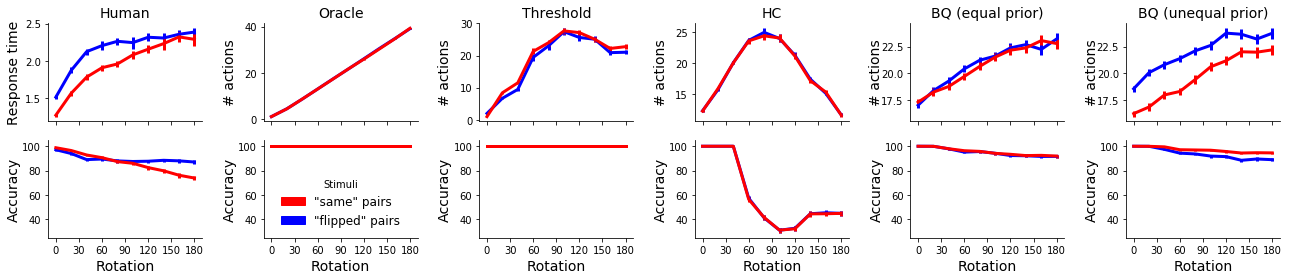

In [12]:
if RUN_ANALYSES:
    analyses.theta_time.run(all_data, RESULTS_PATH, SEED)
    analyses.theta_accuracy.run(all_data, RESULTS_PATH, SEED)
plots.response_time_accuracy.plot(RESULTS_PATH, FIG_PATH)

In [13]:
if RUN_ANALYSES:
    analyses.response_time_means.run(all_data, RESULTS_PATH, SEED)
    analyses.theta_time_corrs.run(all_data, RESULTS_PATH, SEED)

[Path(u'../figures/D/response_time_scatters.png'),
 Path(u'../figures/D/response_time_scatters.pdf')]

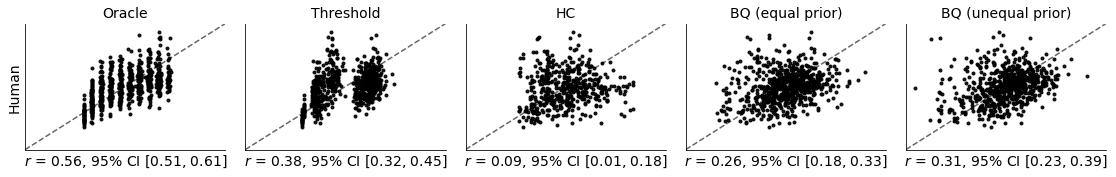

In [14]:
plots.response_time_scatters.plot(RESULTS_PATH, FIG_PATH)

[Path(u'../figures/D/theta_time_corrs.png'),
 Path(u'../figures/D/theta_time_corrs.pdf')]

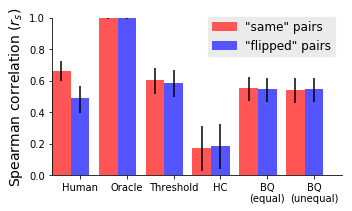

In [15]:
plots.theta_time_corrs.plot(RESULTS_PATH, FIG_PATH)

In [16]:
if RUN_ANALYSES:
    analyses.accuracy_means.run(all_data, RESULTS_PATH, SEED)
    analyses.theta_accuracy_corrs.run(all_data, RESULTS_PATH, SEED)

[Path(u'../figures/D/accuracy_scatters.png'),
 Path(u'../figures/D/accuracy_scatters.pdf')]

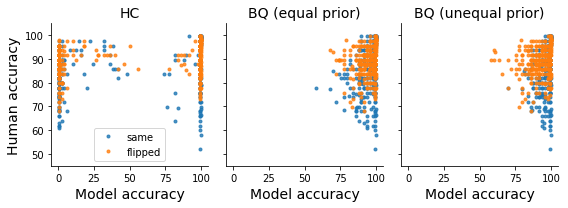

In [17]:
plots.accuracy_scatters.plot(RESULTS_PATH, FIG_PATH)

[Path(u'../figures/D/theta_accuracy_corrs.png'),
 Path(u'../figures/D/theta_accuracy_corrs.pdf')]

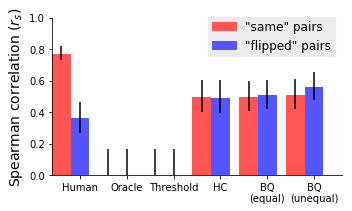

In [18]:
plots.theta_accuracy_corrs.plot(RESULTS_PATH, FIG_PATH)

In [19]:
if RUN_ANALYSES:
    analyses.response_time_corrs.run(all_data, RESULTS_PATH, SEED)
    analyses.accuracy_corrs.run(all_data, RESULTS_PATH, SEED)
    analyses.human_corrs.run(all_data, RESULTS_PATH, SEED)

[Path(u'../figures/D/human_model_corrs.png'),
 Path(u'../figures/D/human_model_corrs.pdf')]

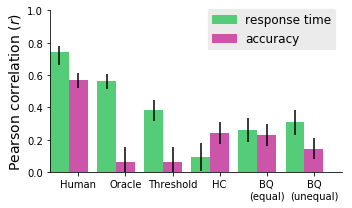

In [20]:
plots.human_model_corrs.plot(RESULTS_PATH, FIG_PATH)

[Path(u'../figures/D/response_time_stimulus.png'),
 Path(u'../figures/D/response_time_stimulus.pdf')]

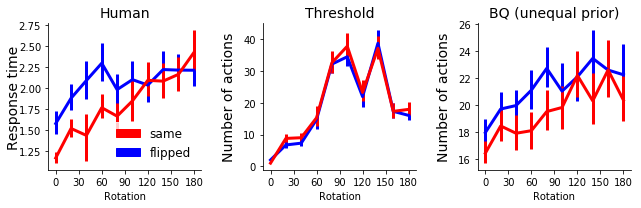

In [21]:
if RUN_ANALYSES:
    analyses.theta_time_stimulus.run(all_data, RESULTS_PATH, SEED)
plots.response_time_stimulus.plot(RESULTS_PATH, FIG_PATH)

### Human response times, per stimulus

[Path(u'../figures/D/response_time_stimuli_exp.png'),
 Path(u'../figures/D/response_time_stimuli_exp.pdf')]

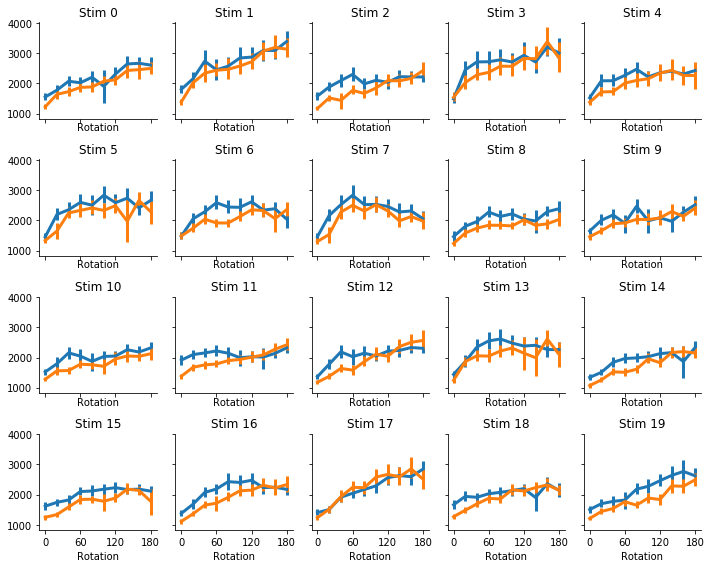

In [22]:
plots.response_time_stimuli.plot_key('exp', RESULTS_PATH, FIG_PATH)

### Thresold model response times, per stimulus

[Path(u'../figures/D/response_time_stimuli_th.png'),
 Path(u'../figures/D/response_time_stimuli_th.pdf')]

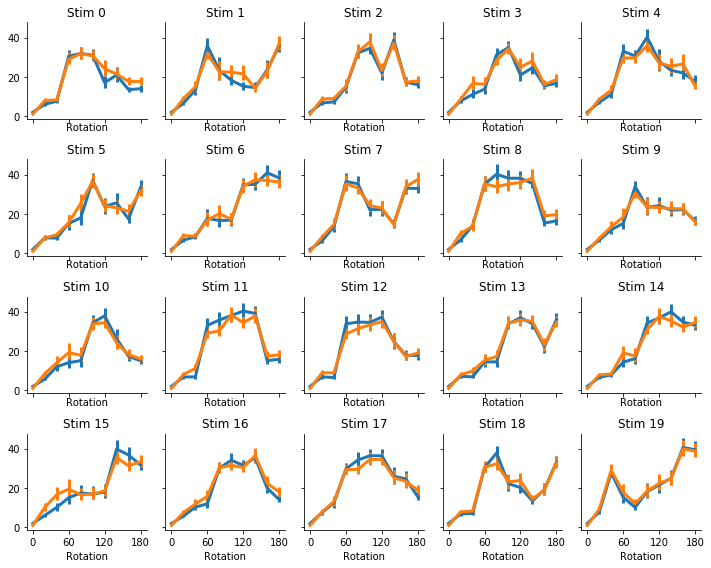

In [23]:
plots.response_time_stimuli.plot_key('th', RESULTS_PATH, FIG_PATH)

### Hill climbing model response times, per stimulus

[Path(u'../figures/D/response_time_stimuli_hc.png'),
 Path(u'../figures/D/response_time_stimuli_hc.pdf')]

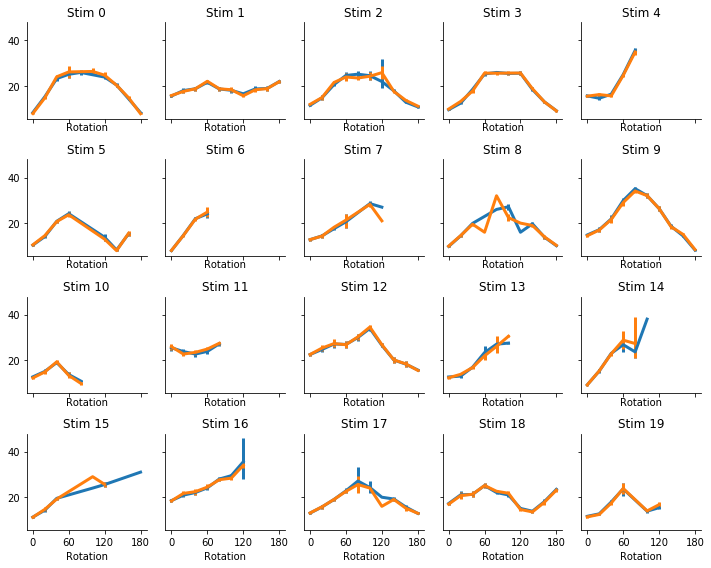

In [24]:
plots.response_time_stimuli.plot_key('hc', RESULTS_PATH, FIG_PATH)

### Bayesian quadrature response times, per stimulus

[Path(u'../figures/D/response_time_stimuli_bq.png'),
 Path(u'../figures/D/response_time_stimuli_bq.pdf')]

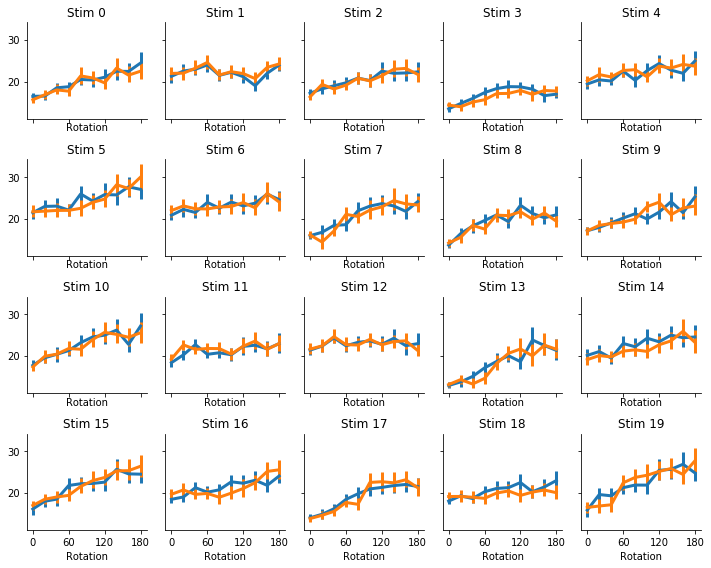

In [25]:
plots.response_time_stimuli.plot_key('bq', RESULTS_PATH, FIG_PATH)

[Path(u'../figures/D/response_time_stimuli_bqp.png'),
 Path(u'../figures/D/response_time_stimuli_bqp.pdf')]

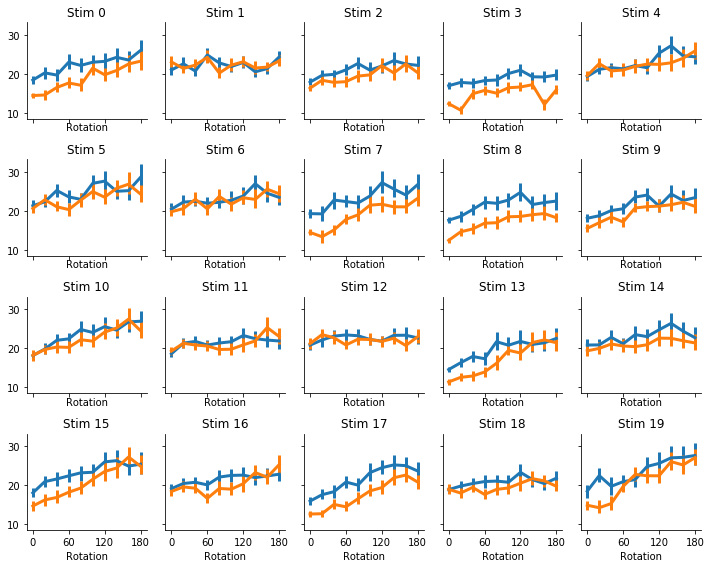

In [26]:
plots.response_time_stimuli.plot_key('bqp', RESULTS_PATH, FIG_PATH)

## Accuracy analysis

In [27]:
if RUN_ANALYSES:
    analyses.overall_accuracy.run(all_data, RESULTS_PATH, SEED)
pd.read_csv(RESULTS_PATH.joinpath(analyses.overall_accuracy.filename))

,model,lower,median,upper
0,bq,95.056133,95.267123,95.472316
1,bqp,95.071446,95.282123,95.487002
2,exp,87.752348,88.072732,88.388230
3,expA,85.942365,86.422237,86.892764
4,expB,89.296385,89.722756,90.138933
5,gs,99.686597,99.971579,99.999939
6,hc,59.223640,59.704919,60.184956
7,oc,99.993720,99.999431,99.999999
8,th,99.993720,99.999431,99.999999


In [28]:
if RUN_ANALYSES:
    analyses.num_chance.run(all_data, RESULTS_PATH, SEED)
pd.read_csv(RESULTS_PATH.joinpath(analyses.num_chance.filename))

,stimulus,theta,flipped,model,chance
0,0,0.0,flipped,bq,False
1,0,0.0,flipped,bqp,False
2,0,0.0,flipped,exp,False
3,0,0.0,flipped,hc,False
4,0,0.0,flipped,oc,False
5,0,0.0,flipped,th,False
6,0,0.0,same,bq,False
7,0,0.0,same,bqp,False
8,0,0.0,same,exp,False
9,0,0.0,same,hc,False


Plot accuracy as a function of angle:

### Human accuracy, per stimulus

In [29]:
if RUN_ANALYSES:
    analyses.theta_accuracy_stimulus.run(all_data, RESULTS_PATH, SEED)

[Path(u'../figures/D/accuracy_stimuli_exp.png'),
 Path(u'../figures/D/accuracy_stimuli_exp.pdf')]

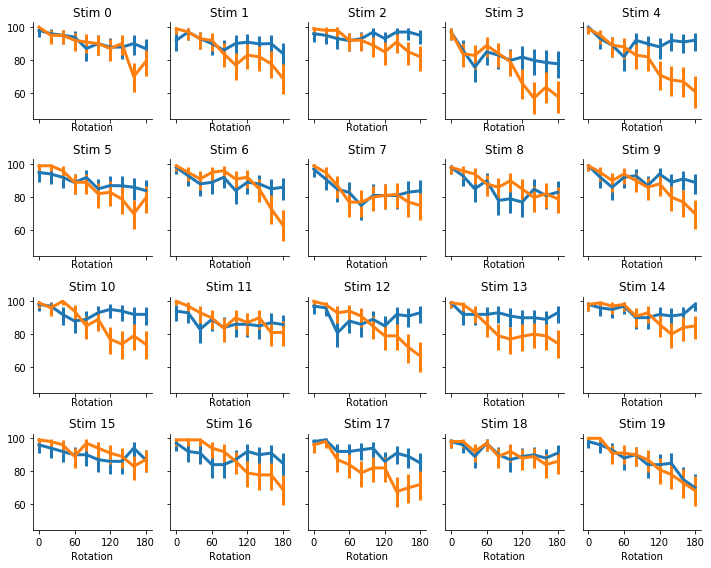

In [30]:
plots.accuracy_stimuli.plot_key('exp', RESULTS_PATH, FIG_PATH)

### Hill climbing model accuracy, per stimulus

[Path(u'../figures/D/accuracy_stimuli_hc.png'),
 Path(u'../figures/D/accuracy_stimuli_hc.pdf')]

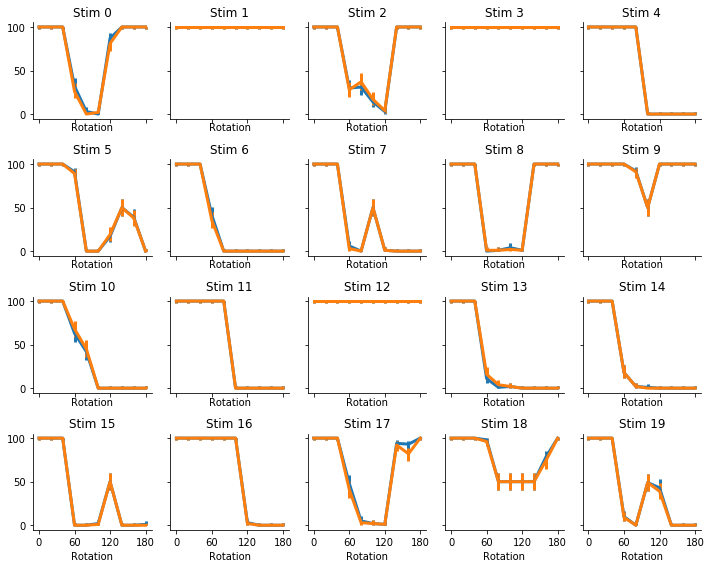

In [31]:
plots.accuracy_stimuli.plot_key('hc', RESULTS_PATH, FIG_PATH)

### Bayesian quadrature model accuracy, per stimulus

[Path(u'../figures/D/accuracy_stimuli_bq.png'),
 Path(u'../figures/D/accuracy_stimuli_bq.pdf')]

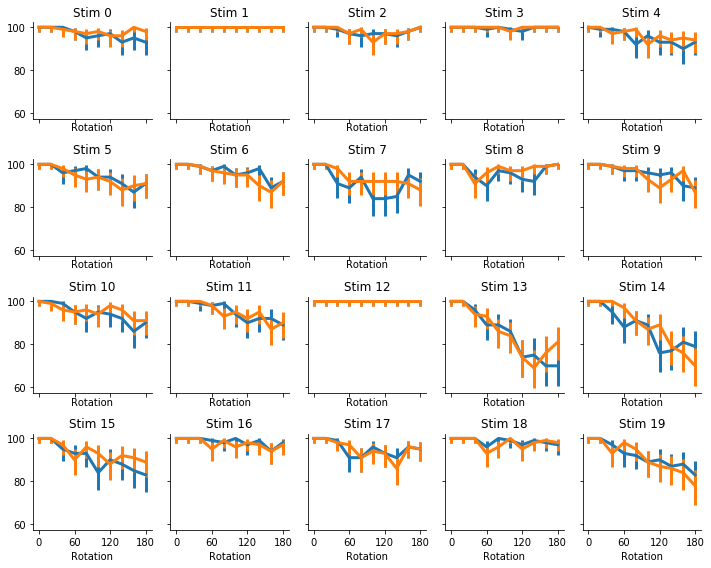

In [32]:
plots.accuracy_stimuli.plot_key('bq', RESULTS_PATH, FIG_PATH)

[Path(u'../figures/D/accuracy_stimuli_bqp.png'),
 Path(u'../figures/D/accuracy_stimuli_bqp.pdf')]

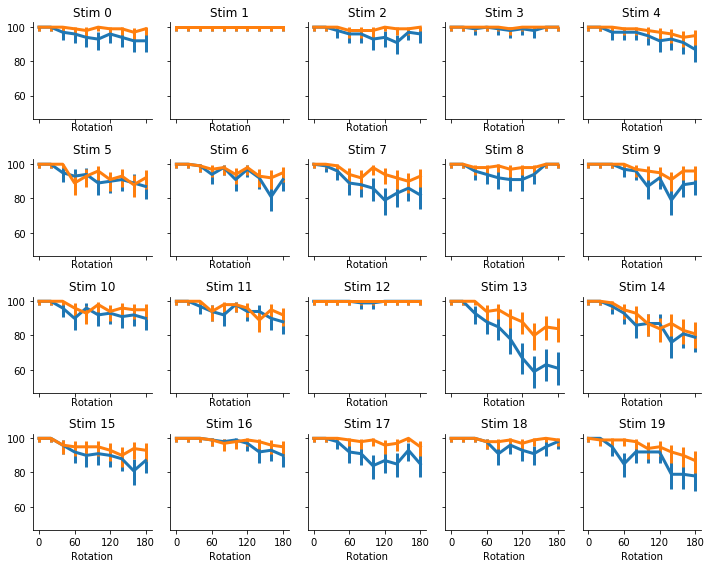

In [33]:
plots.accuracy_stimuli.plot_key('bqp', RESULTS_PATH, FIG_PATH)

## Practice effects

Plot response time as a function of trial, and compute the associated
correlation.

In [34]:
if RUN_ANALYSES:
    analyses.trial_time_means.run(exp_data, RESULTS_PATH, SEED)
    analyses.trial_time_corrs.run(exp_data, RESULTS_PATH, SEED)
pd.read_csv(RESULTS_PATH.joinpath(analyses.trial_time_corrs.filename))

,model,lower,median,upper
0,exp,-0.815430,-0.757738,-0.682801
1,expA,-0.723176,-0.622072,-0.499220
2,expB,-0.724668,-0.610883,-0.470024


[Path(u'../figures/D/trial_time.png'), Path(u'../figures/D/trial_time.pdf')]

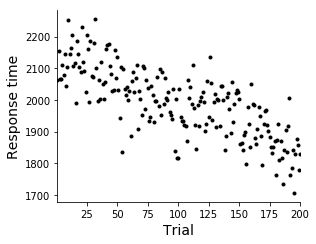

In [35]:
plots.trial_time.plot(RESULTS_PATH, FIG_PATH)

Plot accuracy as a function of trial, and compute the associated
correlation.

In [36]:
if RUN_ANALYSES:
    analyses.trial_accuracy_means.run(exp_data, RESULTS_PATH, SEED)
    analyses.trial_accuracy_corrs.run(exp_data, RESULTS_PATH, SEED)
pd.read_csv(RESULTS_PATH.joinpath(analyses.trial_accuracy_corrs.filename))

,model,lower,median,upper
0,exp,0.576717,0.663855,0.738734
1,expA,0.333893,0.503238,0.650056
2,expB,-0.027389,0.162784,0.342712


[Path(u'../figures/D/trial_accuracy.png'),
 Path(u'../figures/D/trial_accuracy.pdf')]

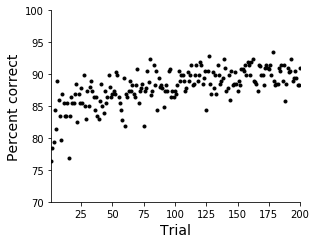

In [37]:
plots.trial_accuracy.plot(RESULTS_PATH, FIG_PATH)